<h2>AMAZON DATA ANALYSIS</h2>

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df = pd.read_csv(r"C:\Users\saikr\OneDrive\Desktop\Intern\Amazon Sales Analysis\Amazon Sales data.csv")

In [3]:
df.shape

(100, 14)

In [4]:
# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### KPIs

In [5]:
Total_Sales = round((df['Total Revenue'].sum()/1000000),2)
print(f"Total Sales : {Total_Sales} M")
Total_Cost = round((df['Total Cost'].sum()/1000000),2)
print(f"Total Cost : {Total_Cost} M")
Total_Profit = round((df['Total Profit'].sum()/1000000),2)
print(f"Total Profit : {Total_Profit} M")
Total_Units_Sold = df['Units Sold'].sum()
print("Total Units Sold :",Total_Units_Sold)
Total_orders = df['Order ID'].count()
print("Total orders :", Total_orders)

Total Sales : 137.35 M
Total Cost : 93.18 M
Total Profit : 44.17 M
Total Units Sold : 512871
Total orders : 100


### ORDER PRIORITY WISE SALES

In [6]:
Priority_abbr = { 'C' : 'Critical' , 'H' : 'High' , 'L' : 'Low' , 'M' : 'Medium'}
Priority_abbr

{'C': 'Critical', 'H': 'High', 'L': 'Low', 'M': 'Medium'}

In [7]:
Priority_wise = df.groupby('Order Priority')['Total Revenue'].sum()

Priority_wise = Priority_wise.reset_index()

Priority_wise["Total Revenue in Millions"] = round(Priority_wise["Total Revenue"]/1000000,2)

Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(Priority_abbr)

Priority_wise.sort_values(by='Total Revenue', ascending=False, inplace=True)

Priority_wise

,Order Priority,Total Revenue,Total Revenue in Millions
1,High,48749546.05,48.75
2,Low,36628127.46,36.63
3,Medium,33116031.75,33.12
0,Critical,18855063.05,18.86


In [8]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


### VISUALIZING ORDER PRIORITY WISE SALES

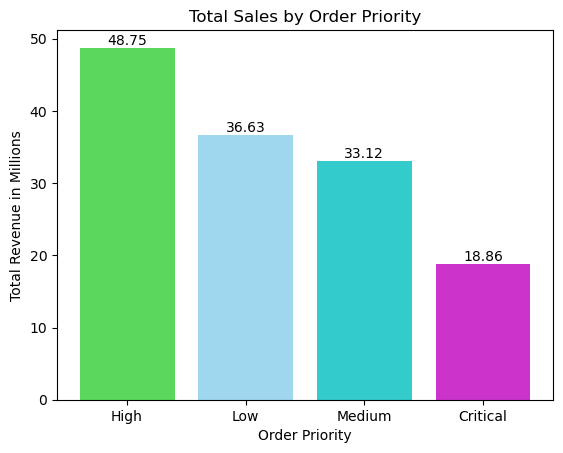

In [9]:

barplot = plt.bar(Priority_wise['Order Priority'], Priority_wise['Total Revenue in Millions'],color = ['limegreen','skyblue','c','m'],alpha = 0.8)
plt.bar_label(barplot,labels = Priority_wise['Total Revenue in Millions'], label_type="edge", color="black")    
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue in Millions')
plt.title('Total Sales by Order Priority')
plt.show()


### YEAR WISE SALES

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
Year_wise_Sales = df.groupby(df['Order Date'].dt.year)['Total Revenue'].sum()
Year_wise_Sales = Year_wise_Sales.reset_index()
Year_wise_Sales["Total Revenue in Millions"] = round(Year_wise_Sales["Total Revenue"]/1000000,2)
Year_wise_Sales.rename(columns = {"Order Date":"Year"}, inplace = True)
Year_wise_Sales

,Year,Total Revenue,Total Revenue in Millions
0,2010,19186024.92,19.19
1,2011,11129166.07,11.13
2,2012,31898644.52,31.90
3,2013,20330448.66,20.33
4,2014,16630214.43,16.63
5,2015,12427982.86,12.43
6,2016,12372867.22,12.37
7,2017,13373419.63,13.37


### VISUALIZING YEAR WISE SALES

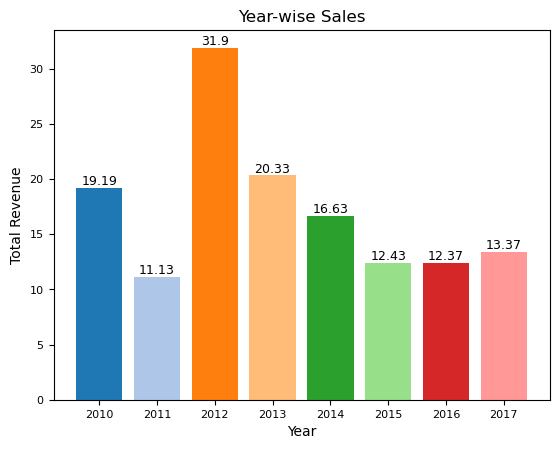

In [12]:
# Creating a bar plot for year-wise total sales

barplot = plt.bar(Year_wise_Sales['Year'], Year_wise_Sales['Total Revenue in Millions'], color=plt.cm.tab20.colors)
plt.bar_label(barplot, labels = Year_wise_Sales['Total Revenue in Millions'], label_type="edge", color="black", fontsize=9)

# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Year-wise Sales')

# Setting font sizes for the tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### ITEM TYPE WISE UNITS SOLD

In [13]:
Item_wise_Units = df.groupby('Item Type')['Units Sold'].sum()

Item_wise_Units = Item_wise_Units.reset_index()

Item_wise_Units['Units Sold'] = Item_wise_Units['Units Sold'] / 1000

Item_wise_Units['Units Sold'] = round(Item_wise_Units['Units Sold'], 2)

Item_wise_Units.rename(columns={'Units Sold': 'Units Sold (in 1000s)'}, inplace=True)

Item_wise_Units

,Item Type,Units Sold (in 1000s)
0,Baby Food,40.54
1,Beverages,56.71
2,Cereal,25.88
3,Clothes,71.26
4,Cosmetics,83.72
5,Fruits,50.00
6,Household,44.73
7,Meat,10.68
8,Office Supplies,46.97
9,Personal Care,48.71


### VISUALIZING ITEM TYPE WISE UNITS SOLD

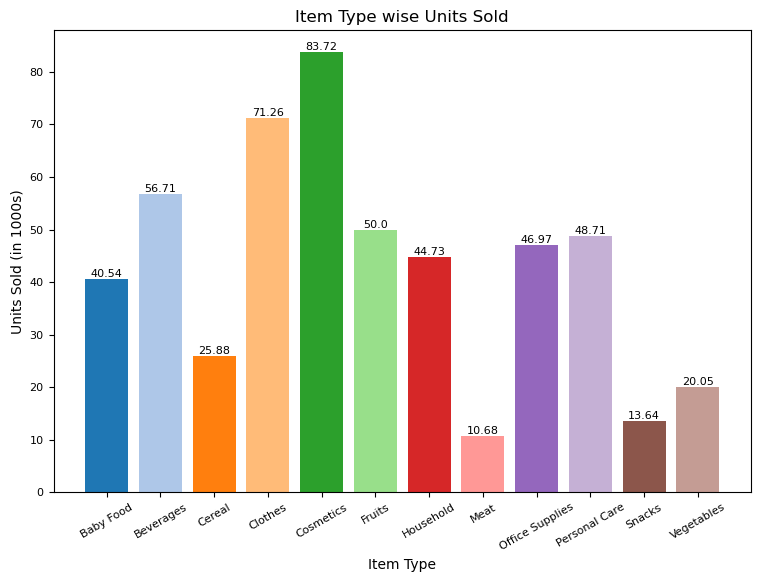

In [14]:
plt.figure(figsize=(9, 6))
item_units_barplot = plt.bar(Item_wise_Units['Item Type'], Item_wise_Units['Units Sold (in 1000s)'], color=plt.cm.tab20.colors)

plt.bar_label(item_units_barplot, labels=Item_wise_Units['Units Sold (in 1000s)'], label_type='edge', color="black", fontsize=8)

plt.xlabel('Item Type')
plt.ylabel('Units Sold (in 1000s)')

plt.title('Item Type wise Units Sold')

plt.xticks(rotation=30, size=8)
plt.yticks(fontsize=8)

plt.show()


### ITEM TYPE WISE SALES

In [15]:
Item_wise_Sales = df.groupby('Item Type')['Total Revenue'].sum()

Item_wise_Sales = Item_wise_Sales.reset_index()

Item_wise_Sales['Total Revenue in Millions'] = round(Item_wise_Sales['Total Revenue']/1000000,2)

Item_wise_Sales

,Item Type,Total Revenue,Total Revenue in Millions
0,Baby Food,10350327.60,10.35
1,Beverages,2690794.60,2.69
2,Cereal,5322898.90,5.32
3,Clothes,7787292.80,7.79
4,Cosmetics,36601509.60,36.60
5,Fruits,466481.34,0.47
6,Household,29889712.29,29.89
7,Meat,4503675.75,4.50
8,Office Supplies,30585380.07,30.59
9,Personal Care,3980904.84,3.98


### VISUALIZING ITEM TYPE WISE SALES

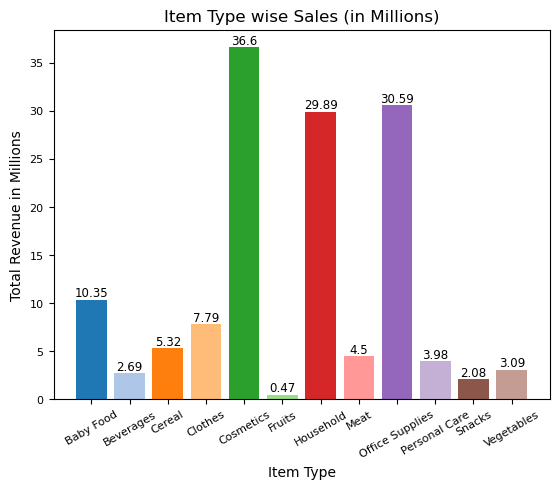

In [16]:
item_units_barplot = plt.bar(Item_wise_Sales['Item Type'], Item_wise_Sales['Total Revenue in Millions'], color=plt.cm.tab20.colors)

plt.bar_label(item_units_barplot, labels=Item_wise_Sales['Total Revenue in Millions'], label_type='edge', color="black", fontsize=8.5)

plt.xlabel('Item Type')
plt.ylabel('Total Revenue in Millions')
plt.title('Item Type wise Sales (in Millions)')

plt.xticks(rotation=30, size=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

### ITEM TYPE WISE PROFIT

In [17]:
# Group by 'Item Type' and sum the 'Total Profit' column
Item_wise_Profit = df.groupby('Item Type')['Total Profit'].sum()

# Reset the index to make 'Item Type' a column
Item_wise_Profit = Item_wise_Profit.reset_index()

# Convert 'Total Profit' to million dollars and round off to two decimal places
Item_wise_Profit['Total Profit'] = Item_wise_Profit['Total Profit'].apply(lambda x: x / 1000000).round(2)

# Sort the DataFrame by 'Total Profit' in descending order
Item_wise_Profit.sort_values(by='Total Profit', ascending=False, inplace=True)

# Rename the 'Total Profit' column
Item_wise_Profit.rename(columns={'Total Profit': 'Total Profit (in Mill.)'}, inplace=True)

# Print the resulting DataFrame
Item_wise_Profit


,Item Type,Total Profit (in Mill.)
4,Cosmetics,14.56
6,Household,7.41
8,Office Supplies,5.93
3,Clothes,5.23
0,Baby Food,3.89
2,Cereal,2.29
11,Vegetables,1.27
9,Personal Care,1.22
1,Beverages,0.89
10,Snacks,0.75


### VISUALIZING ITEM TYPE WISE PROFIT

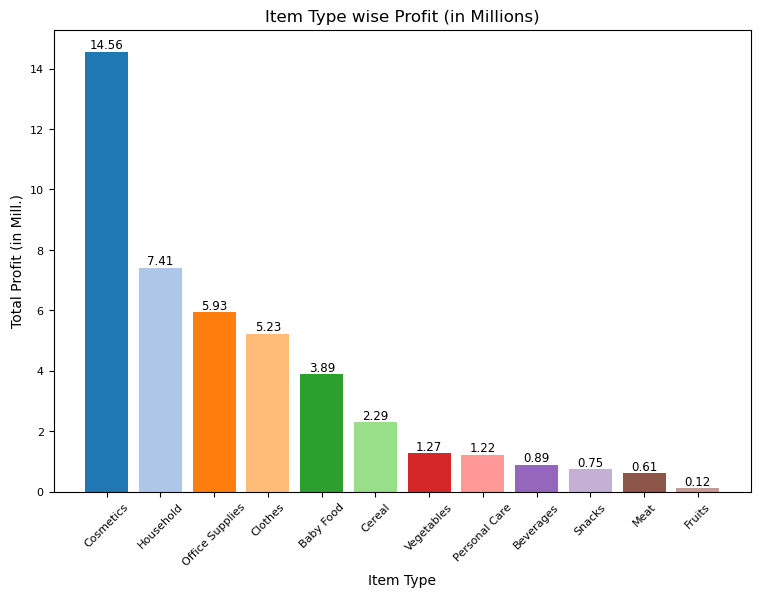

In [18]:
# Plotting a bar chart for item-wise profit

# Importing required libraries
import matplotlib.pyplot as plt

# Creating the figure and setting its size
plt.figure(figsize=(9, 6))

# Creating the bar plot
item_units_barplot = plt.bar(Item_wise_Profit['Item Type'], Item_wise_Profit['Total Profit (in Mill.)'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(item_units_barplot, labels=Item_wise_Profit['Total Profit (in Mill.)'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Item Type')
plt.ylabel('Total Profit (in Mill.)')
plt.title('Item Type wise Profit (in Millions)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()

### ITEM TYPE WISE SALES & PROFIT

In [19]:
Item_wise_Sales = df.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum()

Item_wise_Sales = Item_wise_Sales.reset_index()

Item_wise_Sales['Total Revenue in Millions'] = round(Item_wise_Sales['Total Revenue']/1000000,2)
Item_wise_Sales['Total Profit in Millions'] = round(Item_wise_Sales['Total Profit']/1000000,2)

Item_wise_Sales

,Item Type,Total Revenue,Total Profit,Total Revenue in Millions,Total Profit in Millions
0,Baby Food,10350327.60,3886643.70,10.35,3.89
1,Beverages,2690794.60,888047.28,2.69,0.89
2,Cereal,5322898.90,2292443.43,5.32,2.29
3,Clothes,7787292.80,5233334.40,7.79,5.23
4,Cosmetics,36601509.60,14556048.66,36.60,14.56
5,Fruits,466481.34,120495.18,0.47,0.12
6,Household,29889712.29,7412605.71,29.89,7.41
7,Meat,4503675.75,610610.00,4.50,0.61
8,Office Supplies,30585380.07,5929583.75,30.59,5.93
9,Personal Care,3980904.84,1220622.48,3.98,1.22


### VISUALIZING ITEM TYPE WISE SALES & PROFIT

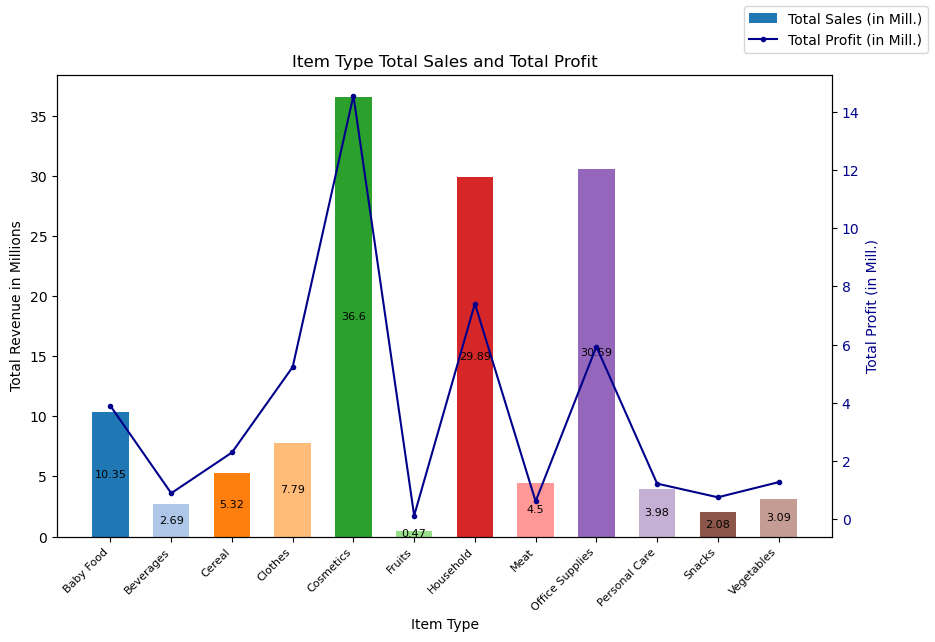

In [20]:

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.6
bar_positions = range(len(Item_wise_Sales['Item Type']))
bars = ax1.bar(bar_positions, Item_wise_Sales['Total Revenue in Millions'], width=bar_width, color=plt.cm.tab20.colors, label='Total Sales (in Mill.)')

ax1.bar_label(bars, labels=Item_wise_Sales['Total Revenue in Millions'], label_type='center', color='black', fontsize=8)

ax1.set_xlabel('Item Type')
ax1.set_ylabel('Total Revenue in Millions')
ax1.set_title('Item Type Total Sales and Total Profit')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(Item_wise_Sales['Item Type'], rotation=45, ha='right', fontsize=8)

ax2 = ax1.twinx()

line_plot = ax2.plot(bar_positions, Item_wise_Sales['Total Profit in Millions'], color='darkblue', marker='.', linestyle='-', linewidth=1.5, label='Total Profit (in Mill.)')
ax2.set_ylabel('Total Profit (in Mill.)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

fig.legend()


plt.show()


### SALES CHANNEL WISE PROFIT

In [21]:
Channel_wise_Profit = df.groupby('Sales Channel')['Total Profit'].sum()

Channel_wise_Profit = Channel_wise_Profit.reset_index()

Channel_wise_Profit['Total Profit'] = Channel_wise_Profit['Total Profit'].apply(lambda x : f"$ {x/1000000:.2f} M")

Channel_wise_Profit.sort_values(by='Total Profit', ascending=False, inplace=True)

Channel_wise_Profit


,Sales Channel,Total Profit
0,Offline,$ 24.92 M
1,Online,$ 19.25 M


### REGION WISE TOTAL PROFIT

In [23]:
Region_wise_Profit = df.groupby('Region')['Total Profit'].sum()

Region_wise_Profit = Region_wise_Profit.reset_index()

Region_wise_Profit['Total Profit in Million'] = round(Region_wise_Profit['Total Profit']/1000000,2)

Region_wise_Profit

,Region,Total Profit,Total Profit in Million
0,Asia,6113845.87,6.11
1,Australia and Oceania,4722160.03,4.72
2,Central America and the Caribbean,2846907.85,2.85
3,Europe,11082938.63,11.08
4,Middle East and North Africa,5761191.86,5.76
5,North America,1457942.76,1.46
6,Sub-Saharan Africa,12183211.40,12.18


### REGION WISE SALES, PROFIT & PROFIT MARGIN

In [24]:
Region_wise_Sales_Profit = df.groupby('Region')[['Total Revenue','Total Profit']].sum()

Region_wise_Sales_Profit = Region_wise_Sales_Profit.reset_index()

Region_wise_Sales_Profit['Profit Margin'] = (Region_wise_Sales_Profit['Total Revenue']/Region_wise_Sales_Profit['Total Profit']).round(2)

Region_wise_Sales_Profit.sort_values(by = 'Profit Margin', ascending = False, inplace = True)

Region_wise_Sales_Profit['Total Revenue'] = Region_wise_Sales_Profit['Total Revenue'].apply(lambda x: f"$ {x / 1000000:.2f} M")

Region_wise_Sales_Profit['Total Profit'] = Region_wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ {x / 1000000:.2f} M")

Region_wise_Sales_Profit

,Region,Total Revenue,Total Profit,Profit Margin
5,North America,$ 5.64 M,$ 1.46 M,3.87
0,Asia,$ 21.35 M,$ 6.11 M,3.49
6,Sub-Saharan Africa,$ 39.67 M,$ 12.18 M,3.26
2,Central America and the Caribbean,$ 9.17 M,$ 2.85 M,3.22
3,Europe,$ 33.37 M,$ 11.08 M,3.01
1,Australia and Oceania,$ 14.09 M,$ 4.72 M,2.98
4,Middle East and North Africa,$ 14.05 M,$ 5.76 M,2.44


### VISUALIZING REGION WISE PROFIT MARGIN

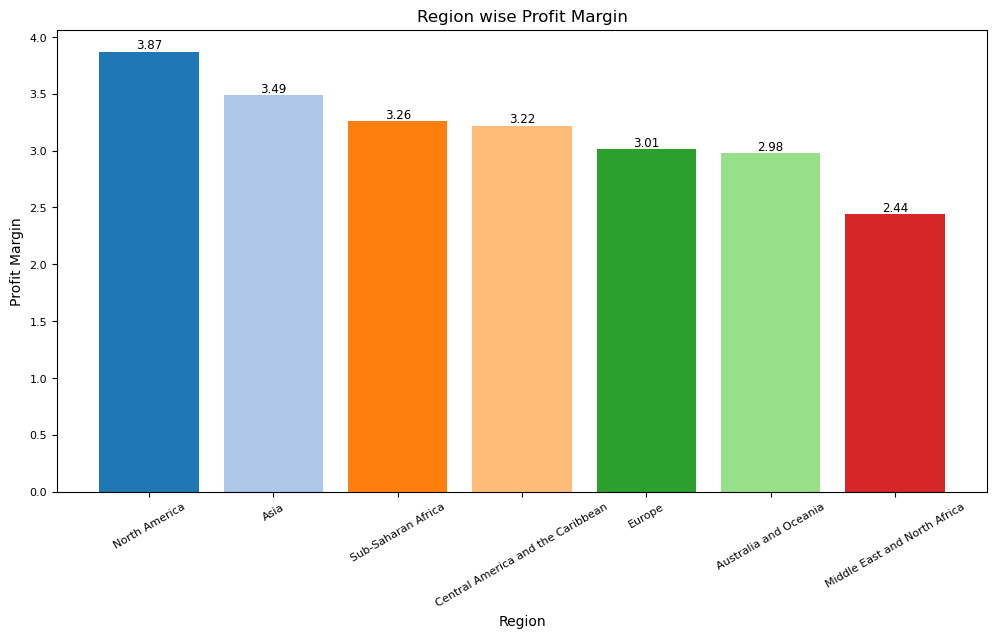

In [25]:
# Creating a bar plot for profit margin of top 10 countries

plt.figure(figsize=(12, 6))

Region_wise_Profit_margin = Region_wise_Sales_Profit[['Region', 'Profit Margin']]

# Creating the bar plot
Region_profit_bar = plt.bar(Region_wise_Sales_Profit['Region'], Region_wise_Sales_Profit['Profit Margin'], color=plt.cm.tab20.colors)

# Adding data labels to the bars
plt.bar_label(Region_profit_bar, labels=Region_wise_Sales_Profit['Profit Margin'], label_type='edge', color="black", fontsize=8.5)    

# Adding labels and title to the plot
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.title('Region wise Profit Margin')

# Rotating x-axis labels for better readability
plt.xticks(rotation = 30, size=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


### CREATING A COLUMN DELIVERY TIME

In [26]:
df['Delivery_time'] = df['Ship Date'] - df['Order Date']
df


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery_time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,39 days
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,47 days
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,28 days
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,9 days


### REGION WISE AVERAGE DELIVERY TIME

In [27]:
Avg_Delivery_time = df.groupby('Region')['Delivery_time'].mean()

Avg_Delivery_time = Avg_Delivery_time.reset_index()

Avg_Delivery_time['Delivery_time'] = Avg_Delivery_time['Delivery_time'].apply(lambda x: x.total_seconds() / 86400).round(2)

Avg_Delivery_time.rename(columns={'Delivery_time': 'Avg_Del_time (in Days)'}, inplace=True)

Avg_Delivery_time


,Region,Avg_Del_time (in Days)
0,Asia,28.73
1,Australia and Oceania,24.27
2,Central America and the Caribbean,26.71
3,Europe,24.14
4,Middle East and North Africa,24.20
5,North America,25.67
6,Sub-Saharan Africa,19.89


### VISUALIZING REGION WISE AVERAGE DELIVERY TIME

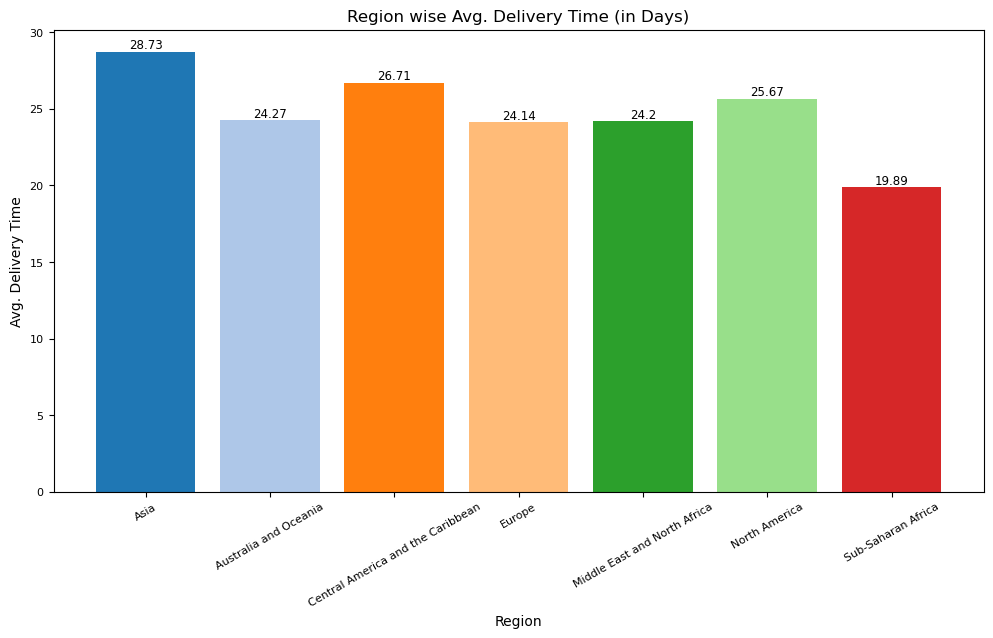

In [28]:
plt.figure(figsize=(12, 6))

item_units_barplot = plt.bar(Avg_Delivery_time['Region'], Avg_Delivery_time['Avg_Del_time (in Days)'], color=plt.cm.tab20.colors)

plt.bar_label(item_units_barplot, labels=Avg_Delivery_time['Avg_Del_time (in Days)'], label_type='edge', color="black", fontsize=8.5)    

plt.xlabel('Region')
plt.ylabel('Avg. Delivery Time')
plt.title('Region wise Avg. Delivery Time (in Days)')

plt.xticks(rotation = 30 , size=8)
plt.yticks(fontsize=8)

plt.show()


### COUNTRY WISE SALES, PROFIT & PROFIT MARGIN

In [29]:
Country_wise_Sales_Profit = df.groupby('Country')[['Total Revenue','Total Profit']].sum()

Country_wise_Sales_Profit = Country_wise_Sales_Profit.reset_index()
 
Country_wise_Sales_Profit['Profit Margin'] = (Country_wise_Sales_Profit['Total Revenue']/Country_wise_Sales_Profit['Total Profit']).round(2)

Country_wise_Sales_Profit['Total Revenue'] = Country_wise_Sales_Profit['Total Revenue'].apply(lambda x: f"$ {x / 1000000:.2f} M")

Country_wise_Sales_Profit['Total Profit'] = Country_wise_Sales_Profit['Total Profit'].apply(lambda x: f"$ {x / 1000000:.2f} M")

Country_wise_Sales_Profit.head(10)

,Country,Total Revenue,Total Profit,Profit Margin
0,Albania,$ 0.25 M,$ 0.17 M,1.49
1,Angola,$ 2.80 M,$ 0.69 M,4.03
2,Australia,$ 2.49 M,$ 0.58 M,4.32
3,Austria,$ 1.24 M,$ 0.50 M,2.51
4,Azerbaijan,$ 4.48 M,$ 1.51 M,2.96
5,Bangladesh,$ 0.90 M,$ 0.61 M,1.49
6,Belize,$ 0.60 M,$ 0.40 M,1.49
7,Brunei,$ 4.37 M,$ 0.85 M,5.16
8,Bulgaria,$ 2.78 M,$ 0.63 M,4.44
9,Burkina Faso,$ 1.25 M,$ 0.51 M,2.44


### PROFIT MARGIN WISE TOP 10 COUNTRIES

In [30]:
country_profit_margin = Country_wise_Sales_Profit[['Country', 'Profit Margin']].head(10)

country_profit_margin

,Country,Profit Margin
0,Albania,1.49
1,Angola,4.03
2,Australia,4.32
3,Austria,2.51
4,Azerbaijan,2.96
5,Bangladesh,1.49
6,Belize,1.49
7,Brunei,5.16
8,Bulgaria,4.44
9,Burkina Faso,2.44


### VISUALIZING PROFIT MARGIN WISE TOP 10 COUNTRIES

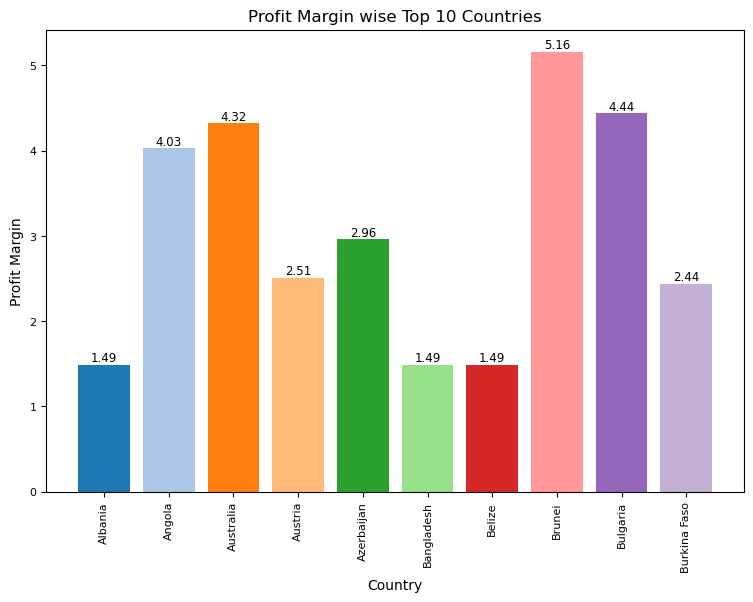

In [31]:

plt.figure(figsize=(9, 6))

country_profit_bar = plt.bar(country_profit_margin['Country'], country_profit_margin['Profit Margin'], color=plt.cm.tab20.colors)

plt.bar_label(country_profit_bar, labels=country_profit_margin['Profit Margin'], label_type='edge', color="black", fontsize=8.5)    

plt.xlabel('Country')
plt.ylabel('Profit Margin')
plt.title('Profit Margin wise Top 10 Countries')

plt.xticks(rotation=90, size=8)
plt.yticks(fontsize=8)
plt.show()


### PROFIT MARGIN WISE BOTTOM 10 COUNTRIES

In [32]:
country_profit_margin = Country_wise_Sales_Profit[['Country', 'Profit Margin']].tail(10)

country_profit_margin

,Country,Profit Margin
66,South Sudan,3.26
67,Spain,4.03
68,Sri Lanka,2.51
69,Switzerland,2.52
70,Syria,3.87
71,The Gambia,3.93
72,Turkmenistan,4.59
73,Tuvalu,2.66
74,United Kingdom,4.03
75,Zambia,2.77


In [34]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Delivery_time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,39 days
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,47 days
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,28 days
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,9 days
